In [1]:
# Short analysis on the metric; "Loan Distribution by Setor"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('kiva_loans.csv')

In [4]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [5]:
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [6]:
df.shape

(671205, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [9]:
# Analysis: Loan Distribution by Sector
#BAR GRAPH

In [10]:
# Grouping by sector and calculating total loan amounts and funded amounts

In [11]:
sector_distribution = df.groupby('sector')[['loan_amount', 'funded_amount']].sum().reset_index()

In [12]:
sector_distribution

,sector,loan_amount,funded_amount
0,Agriculture,143067875.0,133770635.0
1,Arts,12240325.0,11821055.0
2,Clothing,37300925.0,34805270.0
3,Construction,6695150.0,6321515.0
4,Education,30968525.0,30044920.0
5,Entertainment,1389150.0,1023095.0
6,Food,121606150.0,115089210.0
7,Health,9843400.0,9172250.0
8,Housing,23663950.0,21377100.0
9,Manufacturing,5447900.0,5356650.0


In [13]:
# Calculating the percentage of funded amount

In [14]:
sector_distribution['funded_percentage'] = (sector_distribution['funded_amount'] / sector_distribution['loan_amount']) * 100

In [15]:
sector_distribution

,sector,loan_amount,funded_amount,funded_percentage
0,Agriculture,143067875.0,133770635.0,93.501518
1,Arts,12240325.0,11821055.0,96.574682
2,Clothing,37300925.0,34805270.0,93.309402
3,Construction,6695150.0,6321515.0,94.419318
4,Education,30968525.0,30044920.0,97.017601
5,Entertainment,1389150.0,1023095.0,73.648994
6,Food,121606150.0,115089210.0,94.640945
7,Health,9843400.0,9172250.0,93.181726
8,Housing,23663950.0,21377100.0,90.336144
9,Manufacturing,5447900.0,5356650.0,98.325043


In [16]:
# Plotting the distribution in a Bar Graph

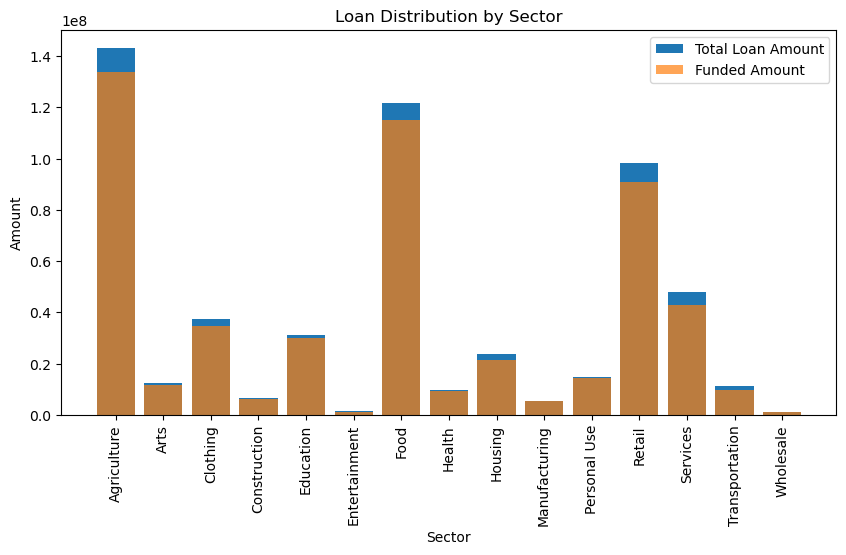

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(sector_distribution['sector'], sector_distribution['loan_amount'], label='Total Loan Amount')
plt.bar(sector_distribution['sector'], sector_distribution['funded_amount'], label='Funded Amount', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.title('Loan Distribution by Sector')
plt.legend()

plt.savefig('Bar_graph.png', bbox_inches='tight')
plt.show()

In [18]:
# Displaying the sector distribution table

In [19]:
sector_distribution

,sector,loan_amount,funded_amount,funded_percentage
0,Agriculture,143067875.0,133770635.0,93.501518
1,Arts,12240325.0,11821055.0,96.574682
2,Clothing,37300925.0,34805270.0,93.309402
3,Construction,6695150.0,6321515.0,94.419318
4,Education,30968525.0,30044920.0,97.017601
5,Entertainment,1389150.0,1023095.0,73.648994
6,Food,121606150.0,115089210.0,94.640945
7,Health,9843400.0,9172250.0,93.181726
8,Housing,23663950.0,21377100.0,90.336144
9,Manufacturing,5447900.0,5356650.0,98.325043


In [20]:
# Pie Chart: Funded Amount Proportion by Sector

In [21]:
# Grouping by sector and calculate total funded amounts

In [22]:
sector_funded_amounts = df.groupby('sector')['funded_amount'].sum().reset_index()

In [23]:
sector_funded_amounts

,sector,funded_amount
0,Agriculture,133770635.0
1,Arts,11821055.0
2,Clothing,34805270.0
3,Construction,6321515.0
4,Education,30044920.0
5,Entertainment,1023095.0
6,Food,115089210.0
7,Health,9172250.0
8,Housing,21377100.0
9,Manufacturing,5356650.0


In [24]:
# Plotting the pie chart

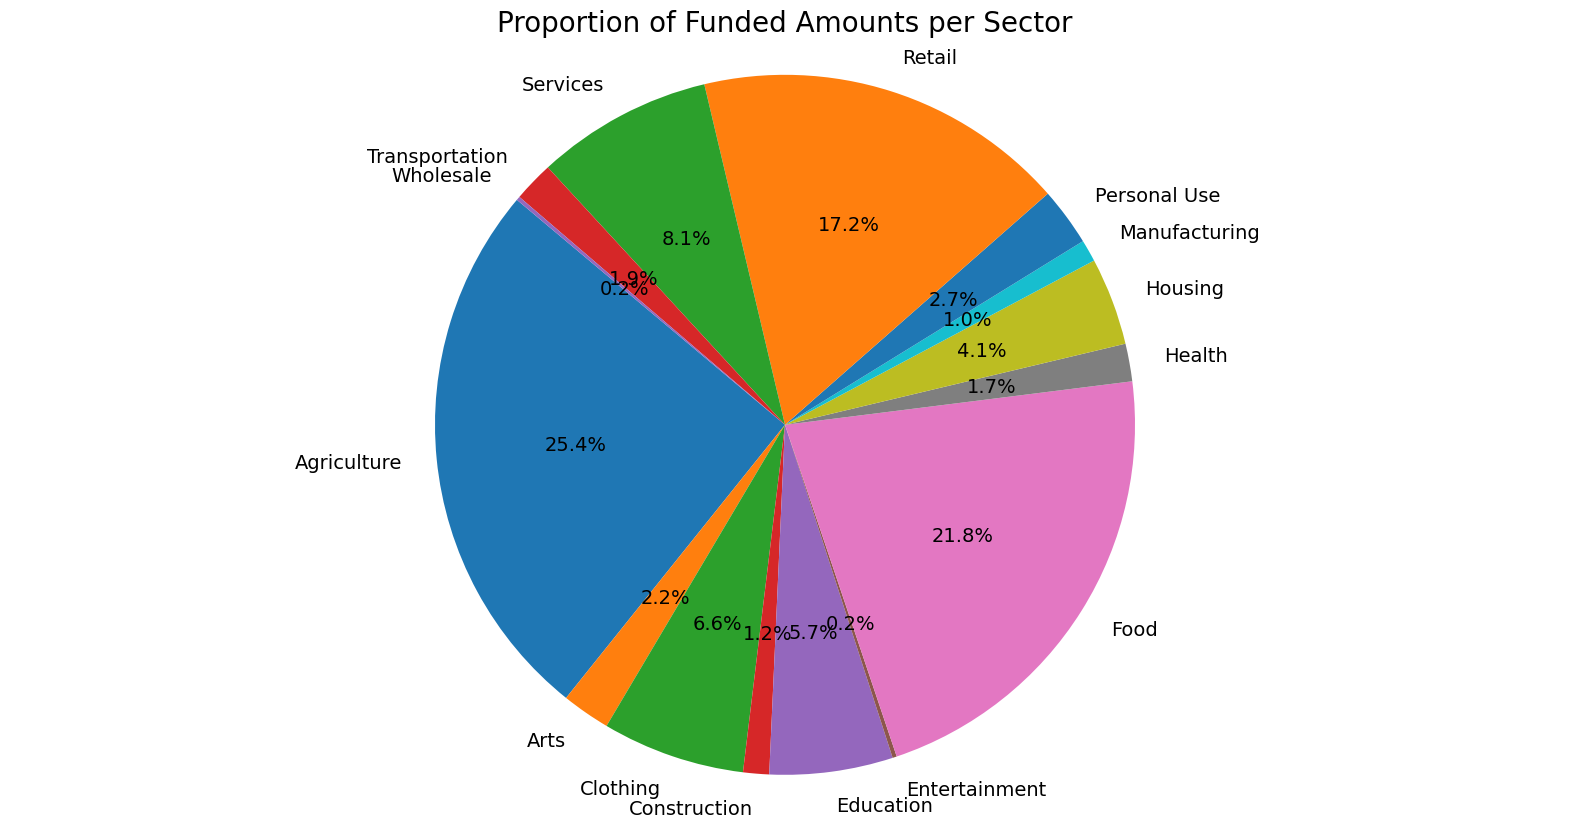

In [30]:
plt.figure(figsize=(20, 10))
# Adjusting the font sizes for the labels and autopct text
plt.pie(
    sector_funded_amounts['funded_amount'], 
    labels=sector_funded_amounts['sector'], 
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'fontsize': 14}  # Adjusting the font size here
)
plt.title('Proportion of Funded Amounts per Sector', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Saving the plot with the bounding box set to 'tight'
plt.savefig('Pie_graph.png', bbox_inches='tight')

# Show the plot
plt.show()